In [1]:
from geopy.geocoders import Nominatim
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import os

In [2]:
geolocator = Nominatim(user_agent="measurements")

In [3]:
locs = ["346 Main St, Springfield, OR 97477", 
        "418 A St, Springfield, OR 97477",
        "1276 G St, Springfield, OR 97477",
        "Aspen St, Springfield, OR 97477",
        "1585 E 13th Ave, Eugene, OR 97403", "999 Willamette St, Eugene, OR 97401", 
        "400 E 19th Ave, Eugene, OR 97401", 
        "1061 W 2nd Ave, Eugene, OR 97402", "101 S A St, Springfield, OR 97477", 
        "1276 G St, Springfield, OR 97477", 
        "250 S 32nd St, Springfield, OR 97478", 
        "3000 Gateway St, Springfield, OR 97477","1025 G St, Springfield, OR 97477", 
        "30 E St, Springfield, OR 97477", "625 West Centennial Blvd", 
        "3377 Riverbend Dr, Springfield, OR 97477"]

In [4]:
def getCoordinates(place):
    location = geolocator.geocode(place)
    address, (latitude, longitude) = location
    return [place, longitude, latitude] 

In [5]:
geolocator.geocode("3377 Riverbend Dr, Springfield, OR 97477")

Location(Riverbend Pavilion, 3377, Riverbend Drive, Springfield, Lane County, Oregon, 97477, United States, (44.0831087, -123.0273096, 0.0))

In [6]:
data = []

In [7]:
names = ['Plank Town', 'Public House', 'Willamalane Adult Activity Center', 'Heron Park',
        'University of Oregon', 'Downtown Eugene', 'South Eugene', 'Whiteaker', 'Springfield Chamber of Commerce', 
         'Willamalane Park Swim Center', 'Bob Keefer Center', 'Gateway Mall', 'Catholic Community Services',
         'Bungalow Market', 'Centennial Center', 'PeaceHealth Riverbend']

In [8]:
for loc in locs:
    ls = getCoordinates(loc)
    ls.insert(0, names[locs.index(loc)])
    data.append(ls)

In [9]:
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Name', 'Address', 'Longitude', 'Latitude'])

In [10]:
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
gdf = GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

In [11]:
import matplotlib.pyplot as plt
import contextily as ctx

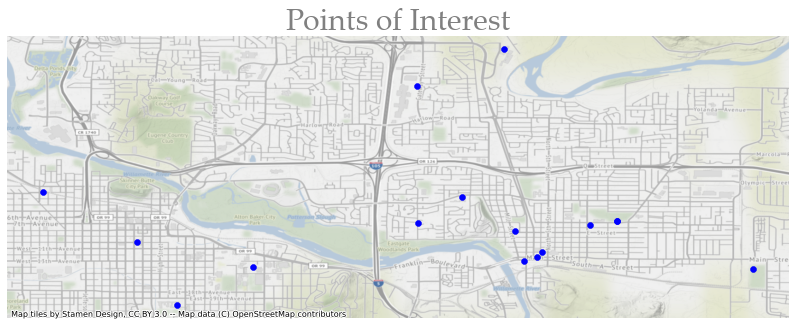

In [12]:
fig, ax = plt.subplots(figsize=(14, 12))
gdf.plot(ax=ax, color='blue', linewidth = 0.5, aspect=1)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), alpha = 0.7)
plt.title("Points of Interest", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [13]:
outpath = r'T:\DCProjects\Support\SPR\data'

In [14]:
selected_facilities_o = gpd.read_file(r"T:\DCProjects\Support\SPR\BikeShare\BikeShare.gdb", layer="selected_facilities")

In [15]:
selected_facilities_o.columns

Index(['label', 'label_full', 'label_add', 'type', 'type_full', 'eug_amenity',
       'school_district', 'address_geofeat_id', 'address_uuid', 'x_coordinate',
       'y_coordinate', 'longitude', 'latitude', 'facility_geo_id', 'geometry'],
      dtype='object')

In [16]:
selected_facilities_o.type_full.unique()

array(['LTD Transit Sta', 'Park', 'Private School', 'High School',
       'Middle School', 'Elementary Sch', 'City Hall'], dtype=object)

In [17]:
selected_facilities_s1 = selected_facilities_o[(selected_facilities_o.type_full.isin(['LTD Transit Sta','City Hall']))]

In [18]:
parks = ['Island Park', 'Dorris Ranch', 'Millrace Park', 'Willamalane Park', 
         'Meadow Park', 'Heron Park', 'Alton Baker Park', 
         'Amazon Park','Skinner Butte Park', 'Monroe Park']

In [19]:
selected_parks = [park for park in parks if park in selected_facilities_o.label_full.values]

In [20]:
selected_facilities_s2 = selected_facilities_o[selected_facilities_o.label_full.isin(selected_parks)]

In [21]:
selected_facilities_s = selected_facilities_s1.append(selected_facilities_s2)

In [22]:
selected_facilities = selected_facilities_s[['label_full', 'longitude', 'latitude', 'geometry']]

In [23]:
selected_facilities.rename(columns ={'label_full':'Name', 'longitude':'Longitude', 'latitude':'Latitude'}, inplace=True)

C:\Users\clid1852\AppData\Anaconda3\envs\geoenv\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [24]:
gdf = gdf.to_crs(epsg=2914)

In [25]:
selected_facilities = selected_facilities.append(gdf[['Name', 'Longitude', 'Latitude', 'geometry']])

In [26]:
selected_facilities = selected_facilities.reset_index(drop=True)

In [27]:
selected_facilities.to_file(os.path.join(outpath, 'points_of_interest.shp'))